In [1]:
PROJECT_ID = "fishiries-alaska"
if len(PROJECT_ID) < 1: #If don't know your project id
    shell_output = !gcloud config list --format 'value(core.project)' 2>/dev/null
    PROJECT_ID = shell_output[0]
    print("Obtained project id")
print("Project ID: ", PROJECT_ID)

Project ID:  fishiries-alaska


In [2]:
REGION = "europe-west1-b"
print("Region: ",REGION)

Region:  europe-west1-b


In [3]:
# I don't think we will use buckert storage, but let's assign it's name in case we needed one
BUCKET_URI = f"gs://{PROJECT_ID}"
print("Bucket Uri: ",BUCKET_URI)

Bucket Uri:  gs://fishiries-alaska


In [4]:
#! gsutil mb -l $REGION -p $PROJECT_ID $BUCKET_URI

In [5]:
#! gsutil ls -al $BUCKET_URI

In [6]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
from google.cloud import bigquery

In [7]:
client = bigquery.Client()

In [8]:
%%bigquery
SELECT * FROM 
`fishiries-alaska.fishiries_alaska_observer.fisheries`
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:00<00:00, 10.74rows/s]


,lat400sqkm,lon400sqkm,gear,year,kg,rate,species,sid
0,52.62444,-179.5,NPT,2017,48.10,0.000950,Lumpsucker Unidentified,525
1,52.78405,-179.5,NPT,1994,15.86,0.000439,Lumpsucker Unidentified,525
2,52.78405,-179.5,NPT,2009,16.07,0.000294,Lumpsucker Unidentified,525
3,52.78405,-179.5,NPT,2012,32.15,0.001216,Lumpsucker Unidentified,525
4,52.62444,-179.5,NPT,2003,3.33,0.000070,Lumpsucker Unidentified,525
5,52.62444,-179.5,NPT,1994,613.21,0.012081,Lumpsucker Unidentified,525
6,52.62444,-179.5,NPT,2016,0.64,0.000010,Lumpsucker Unidentified,525
7,52.62444,-179.5,NPT,2001,31.38,0.000509,Lumpsucker Unidentified,525
8,52.46540,-179.5,NPT,2006,2.16,0.000361,Lumpsucker Unidentified,525
9,52.62444,-179.5,NPT,2006,9.01,0.000108,Lumpsucker Unidentified,525


In [9]:
%bigquery_stats fishiries-alaska.fishiries_alaska_observer.fisheries

Getting table schema...: 100%|██████████| 100/100 [00:01<00:00, 75.98it/s]
Querying data in column 'sid': : 8it [00:09,  1.20s/it]       
Retrieve stats for 'sid': 100%|██████████| 8/8 [00:19<00:00,  2.45s/it]       


In [10]:
sql = """
SELECT * FROM 
`fishiries-alaska.fishiries_alaska_observer.fisheries`
"""

In [11]:
raw_data = client.query(sql).to_dataframe()

In [14]:
raw_data.describe()

,lat400sqkm,lon400sqkm,year,kg,rate,sid
count,328595.000000,328595.000000,328595.000000,3.285950e+05,3.285950e+05,328595.000000
mean,56.714047,-160.835299,2006.164047,9.546879e+04,6.724682e+00,273.643954
std,2.024739,47.455794,6.914990,8.852043e+05,2.078146e+01,166.710278
min,51.213010,-179.833340,1993.000000,1.000000e-02,2.000000e-08,62.000000
25%,55.593860,-172.833340,2001.000000,2.071000e+01,3.428370e-03,159.000000
50%,56.810420,-167.500020,2007.000000,1.919900e+02,4.829073e-02,205.000000
75%,58.067580,-164.166680,2012.000000,2.637075e+03,8.571364e-01,405.000000
max,61.932750,179.833320,2017.000000,6.139968e+07,1.018616e+02,810.000000


In [19]:
raw_data.duplicated().sum()

0

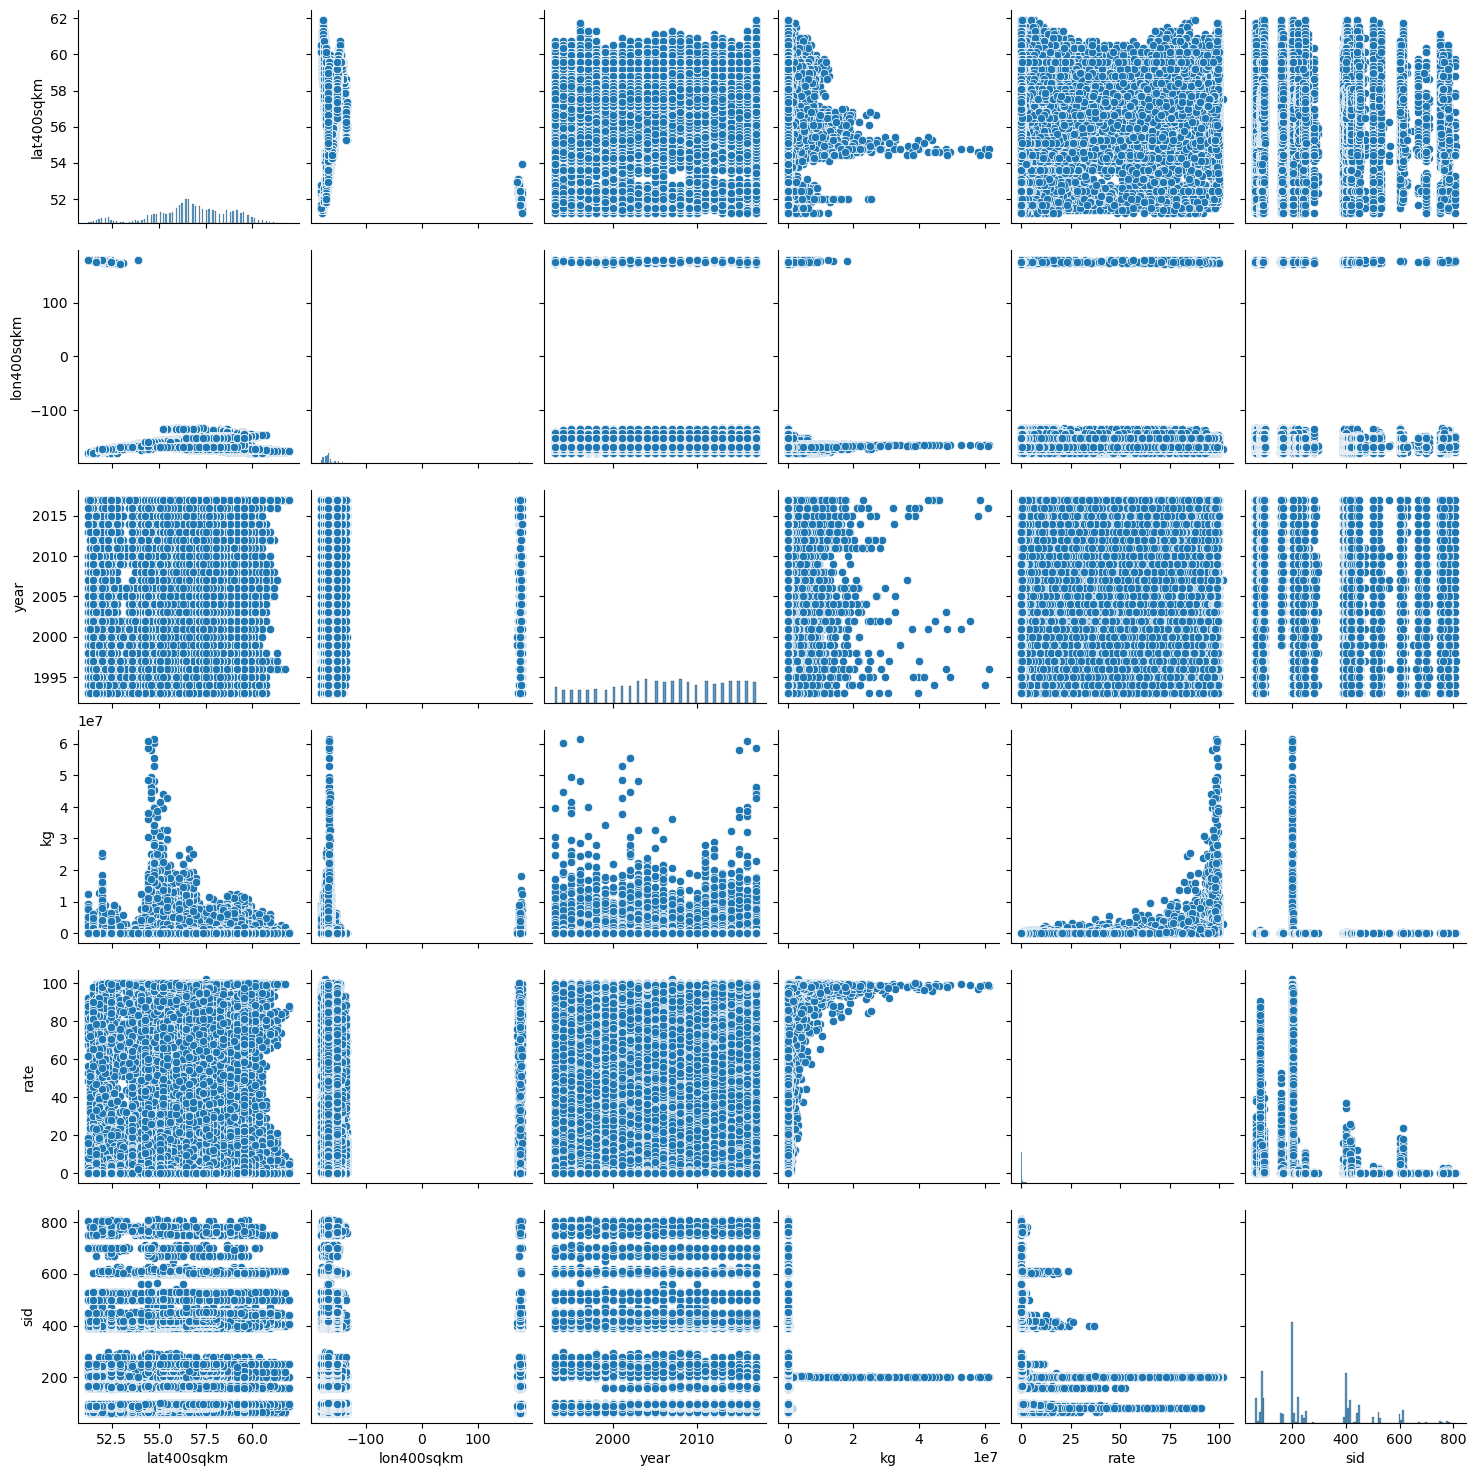

In [20]:
sns.pairplot(raw_data)

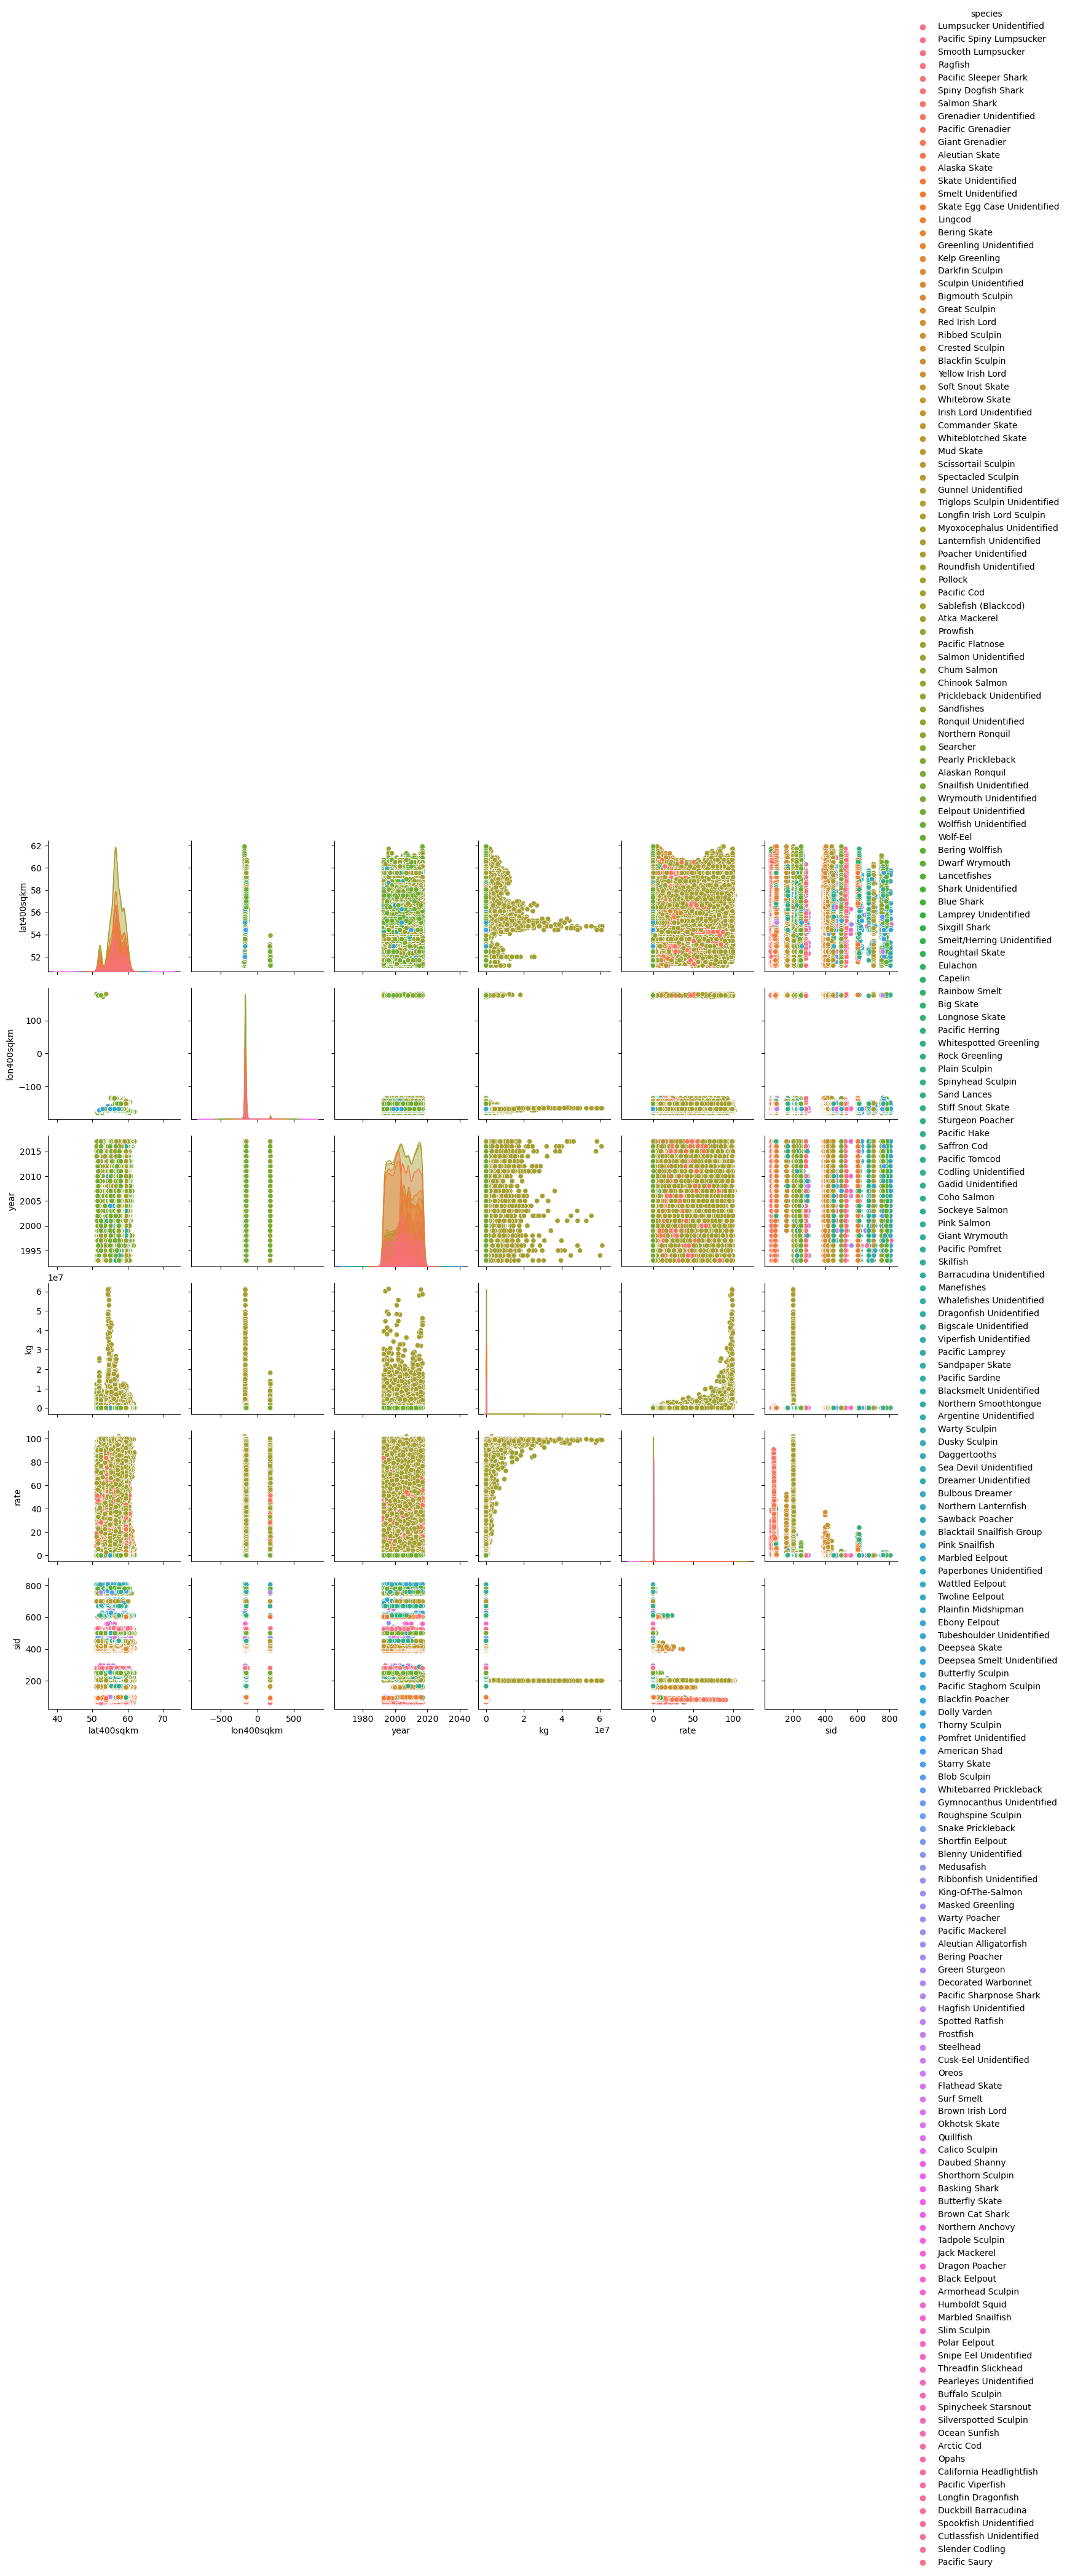

In [23]:
sns.pairplot(raw_data, hue="species")


In [24]:
# Heat map and correlation